<a href="https://colab.research.google.com/github/annwanginnt/Aritificial_intelligence/blob/main/codefile_DS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/MBAN/MBAN 6110 S - DATA SCIENCE I/Final Assignment/spotify_data.csv'

In [ ]:
#df = pd.read_csv('/kaggle/input/spotify-1million-tracks/spotify_data.csv')

In [ ]:
df = pd.read_csv(dataset_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [ ]:
df.describe(include='all')

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1159764,1159764,1159764,1.159764e+06,1.159764e+06,1159764,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
unique,NaN,64159,882361,1159764,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Traditional,Intro,53QF56cjZA9RTuuMZDrSA6,NaN,NaN,black-metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4058,466,1,NaN,NaN,21852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.590613e+05,NaN,NaN,NaN,1.838312e+01,2.011955e+03,NaN,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,NaN,NaN,NaN,1.588554e+01,6.803901e+00,NaN,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00,2.000000e+03,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,NaN,NaN,NaN,5.000000e+00,2.006000e+03,NaN,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,NaN,NaN,NaN,1.500000e+01,2.012000e+03,NaN,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,NaN,NaN,NaN,2.900000e+01,2.018000e+03,NaN,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00


In [ ]:
df['duration_mins'] = df['duration_ms'] / 60000

In [ ]:
df = df.drop(['track_id', 'duration_ms'], axis = 1)

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.drop(df[df['year'] <= 2018].index, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256766 entries, 365885 to 622650
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       256766 non-null  object 
 1   track_name        256766 non-null  object 
 2   popularity        256766 non-null  int64  
 3   year              256766 non-null  int64  
 4   genre             256766 non-null  object 
 5   danceability      256766 non-null  float64
 6   energy            256766 non-null  float64
 7   key               256766 non-null  int64  
 8   loudness          256766 non-null  float64
 9   mode              256766 non-null  int64  
 10  speechiness       256766 non-null  float64
 11  acousticness      256766 non-null  float64
 12  instrumentalness  256766 non-null  float64
 13  liveness          256766 non-null  float64
 14  valence           256766 non-null  float64
 15  tempo             256766 non-null  float64
 16  time_signature 

In [ ]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_mins'],
      dtype='object')

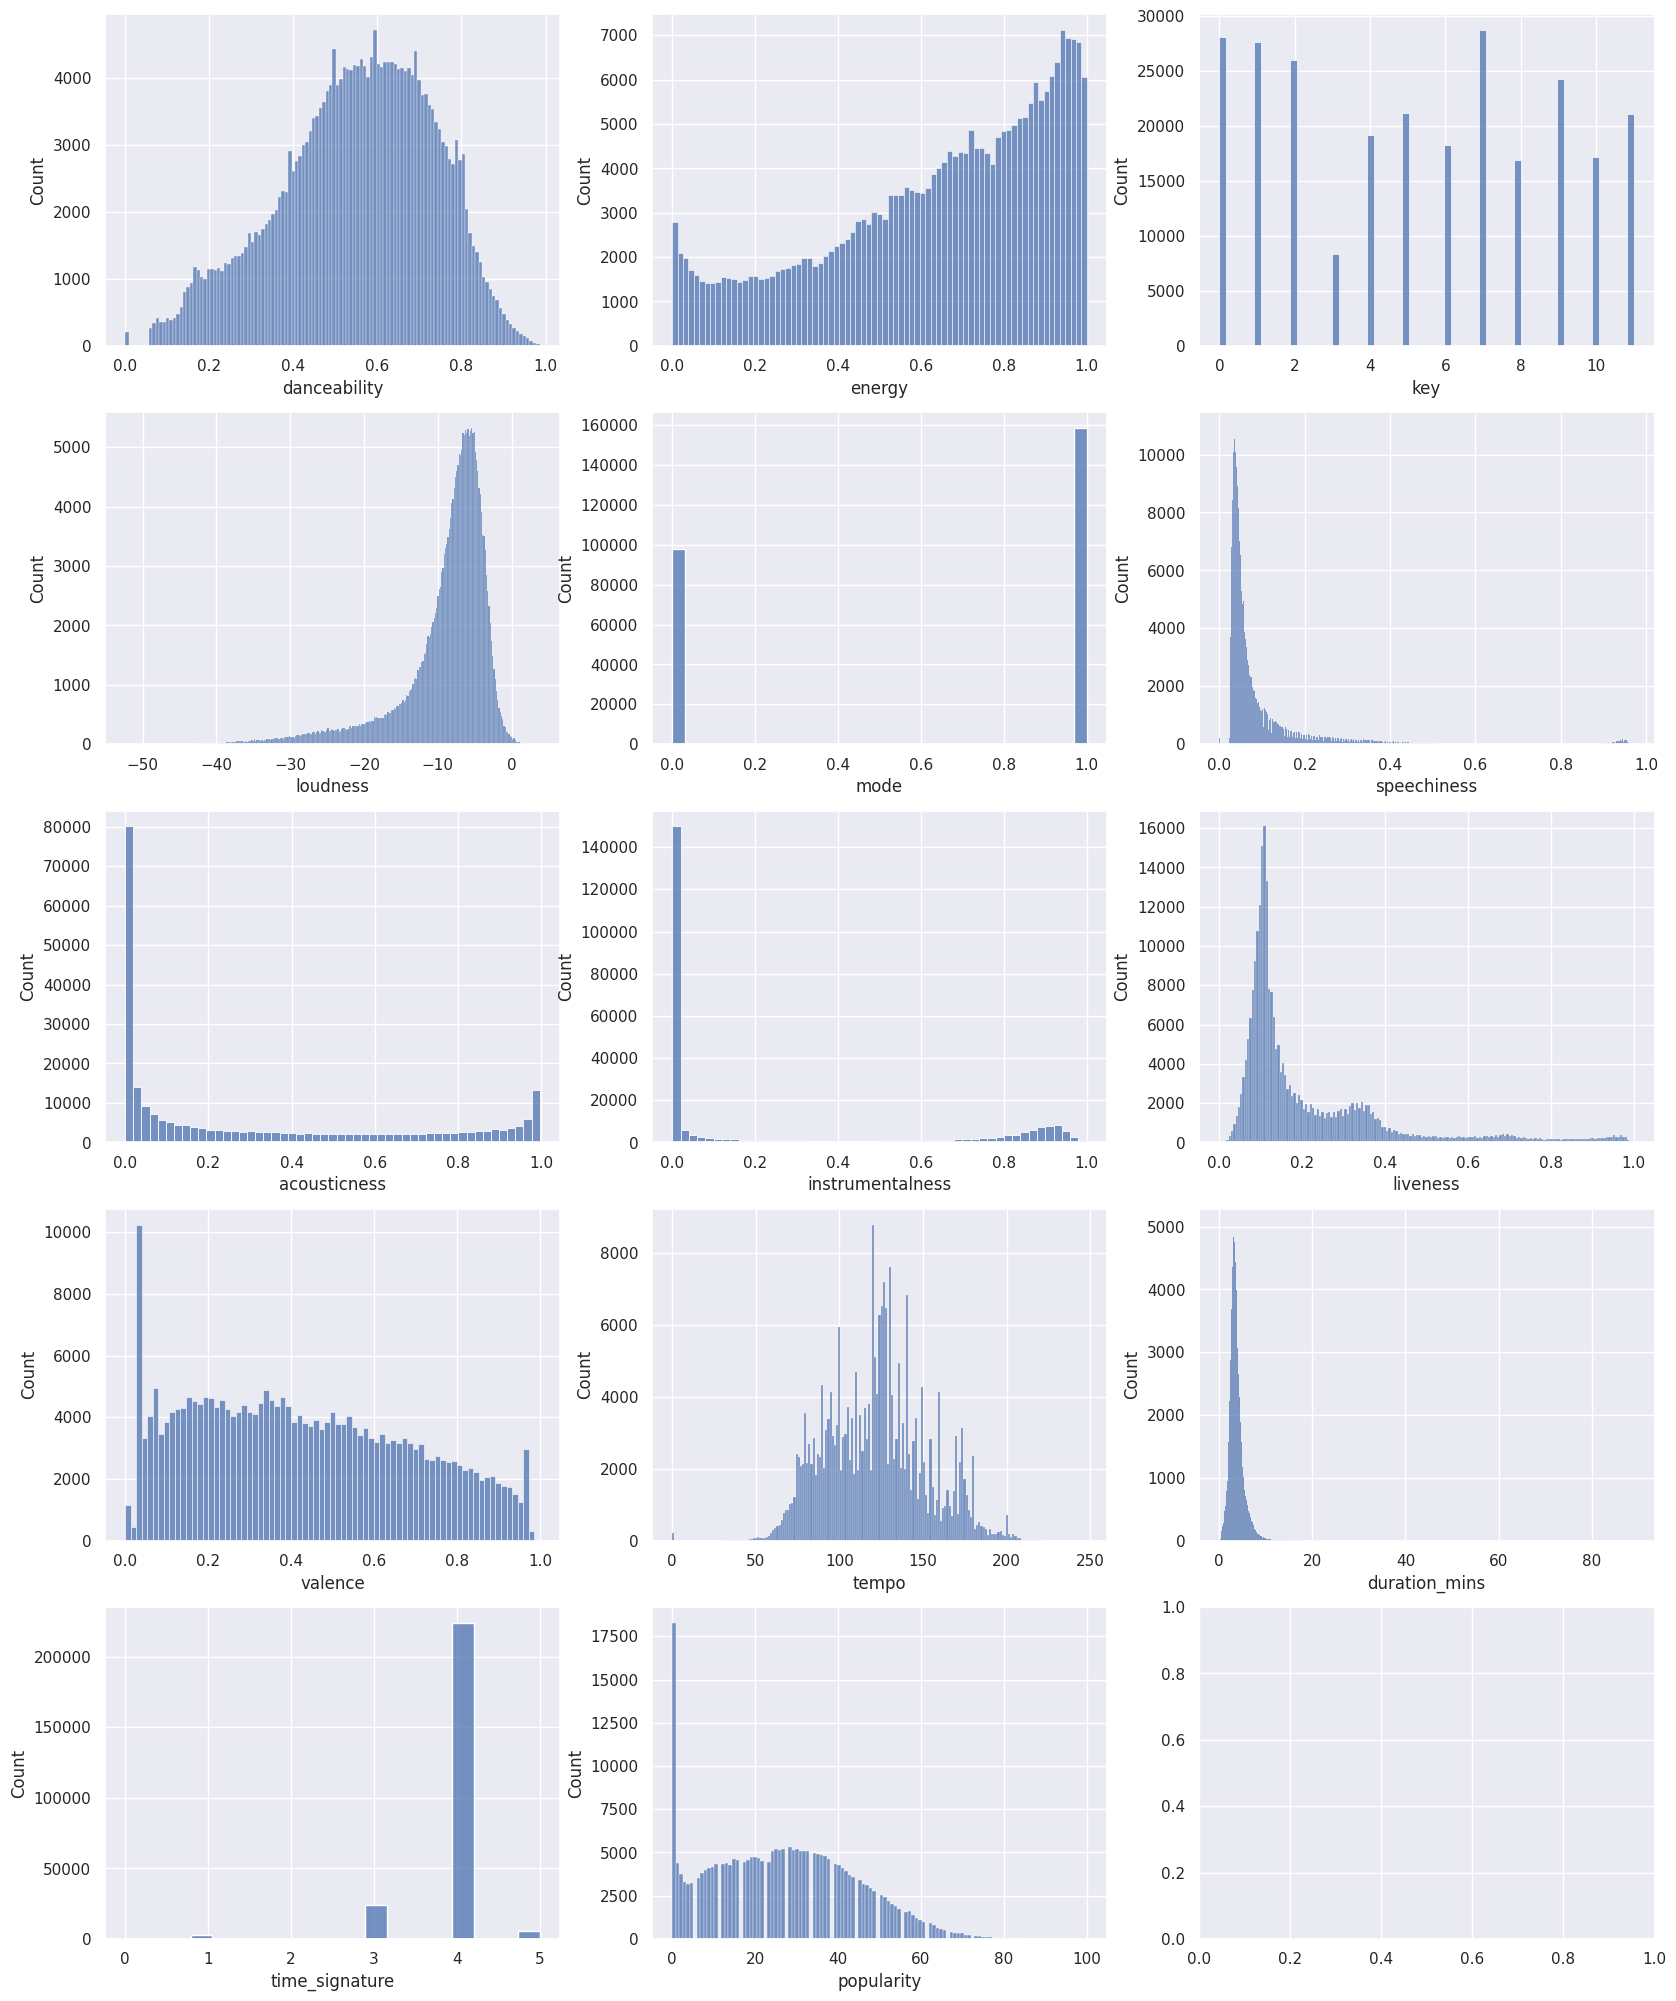

In [ ]:
# Create the 5x3 grid of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14 , _)) = plt.subplots(5, 3, figsize=(20, 25))

# Plot the histograms
sns.histplot(df['danceability'], ax=ax1)
sns.histplot(df['energy'], ax=ax2)
sns.histplot(df['key'], ax=ax3)
sns.histplot(df['loudness'], ax=ax4)
sns.histplot(df['mode'], ax=ax5)
sns.histplot(df['speechiness'], ax=ax6)
sns.histplot(df['acousticness'], ax=ax7)
sns.histplot(df['instrumentalness'], ax=ax8)
sns.histplot(df['liveness'], ax=ax9)
sns.histplot(df['valence'], ax=ax10)
sns.histplot(df['tempo'], ax=ax11)
sns.histplot(df['duration_mins'], ax=ax12)
sns.histplot(df['time_signature'], ax=ax13)
sns.histplot(df['popularity'], ax =ax14)

plt.show()

In [ ]:
df[['popularity']].value_counts()

popularity
0             18273
28             5340
25             5206
27             5203
30             5201
              ...  
93                3
94                1
95                1
96                1
100               1
Length: 98, dtype: int64

In [ ]:
df.drop(df[df['popularity'] == 0].index, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238493 entries, 365885 to 622649
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       238493 non-null  object 
 1   track_name        238493 non-null  object 
 2   popularity        238493 non-null  int64  
 3   year              238493 non-null  int64  
 4   genre             238493 non-null  object 
 5   danceability      238493 non-null  float64
 6   energy            238493 non-null  float64
 7   key               238493 non-null  int64  
 8   loudness          238493 non-null  float64
 9   mode              238493 non-null  int64  
 10  speechiness       238493 non-null  float64
 11  acousticness      238493 non-null  float64
 12  instrumentalness  238493 non-null  float64
 13  liveness          238493 non-null  float64
 14  valence           238493 non-null  float64
 15  tempo             238493 non-null  float64
 16  time_signature 

In [ ]:
df[df['danceability'] == 0]

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
369104,Ólafur Arnalds,saman (berlin) - live,30,2019,ambient,0.0,0.03310,3,-33.039,1,0.0,0.9950,0.939,0.1130,0.0,0.0,0,2.297467
373810,Lapalux,Amnioverse,40,2019,chill,0.0,0.60200,7,-10.703,1,0.0,0.3490,0.689,0.1100,0.0,0.0,0,4.106667
373938,moody woody,Daydream,38,2019,chill,0.0,0.34700,7,-13.645,0,0.0,0.8790,0.889,0.1410,0.0,0.0,0,1.851183
375333,death's dynamic shroud,I Don’t Kiss You Like I Used To​ /​ オリンピックの夢,12,2019,club,0.0,0.45400,1,-9.638,1,0.0,0.1530,0.976,0.1230,0.0,0.0,0,1.838467
390388,Annett Louisan,Die schönsten Wege sind aus Holz - Kleine Liebe,48,2019,german,0.0,0.07820,10,-12.717,1,0.0,0.9730,0.000,0.1090,0.0,0.0,0,2.854450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472495,Ocean Waves For Sleep,Wave Lovers,12,2020,sleep,0.0,0.51500,2,-27.182,1,0.0,0.9330,0.968,0.1080,0.0,0.0,0,2.066667
472501,Ocean Waves For Sleep,Wave Therapy,12,2020,sleep,0.0,0.62300,1,-25.679,1,0.0,0.9350,0.985,0.1190,0.0,0.0,0,1.966667
472516,Dog Music,Feeling Sheltered,19,2020,sleep,0.0,0.03290,4,-27.179,1,0.0,0.9570,0.858,0.1440,0.0,0.0,0,1.586700
472521,White Noise Baby Sleep,Hushed Vacuum,23,2020,sleep,0.0,0.00002,6,-26.726,1,0.0,0.1120,0.828,0.6760,0.0,0.0,0,2.183333


<Axes: xlabel='year', ylabel='Count'>

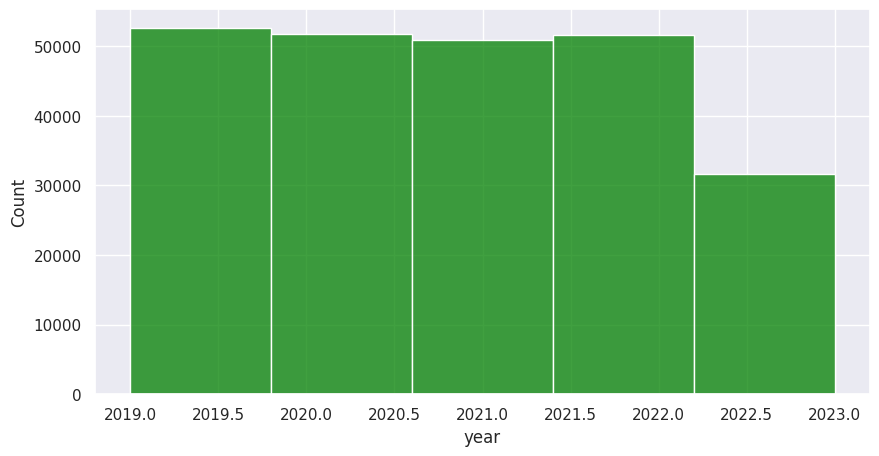

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='year',color='green', bins = 5)

In [ ]:
artist=df['artist_name'].value_counts()
artist=artist[:10,]
print(artist)

Elvis Presley            627
Little Symphony          449
SICK LEGEND              442
Sleep Fruits Music       413
Armin van Buuren         292
Jim Brickman             285
Johann Sebastian Bach    275
Piano Peace              255
Giuseppe Verdi           254
Ludwig van Beethoven     253
Name: artist_name, dtype: int64


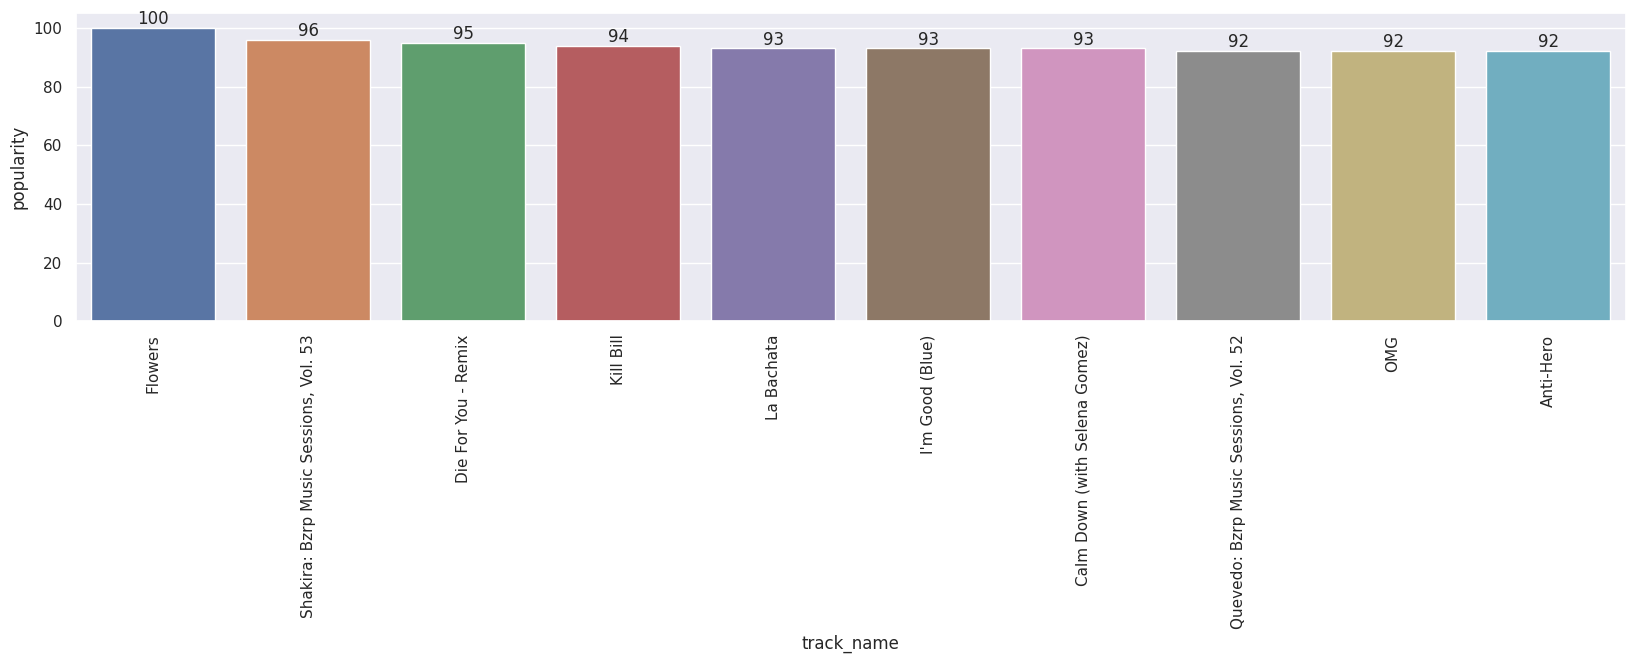

In [ ]:
popularity5=df.sort_values(by='popularity',ascending=False).head(10)
plt.figure(figsize=(20,4))
ac=sns.barplot(data=popularity5,x='track_name',y='popularity')
ac.set_xticklabels(ac.get_xticklabels(), rotation=90)
for i in ac.containers:
    ac.bar_label(i,)

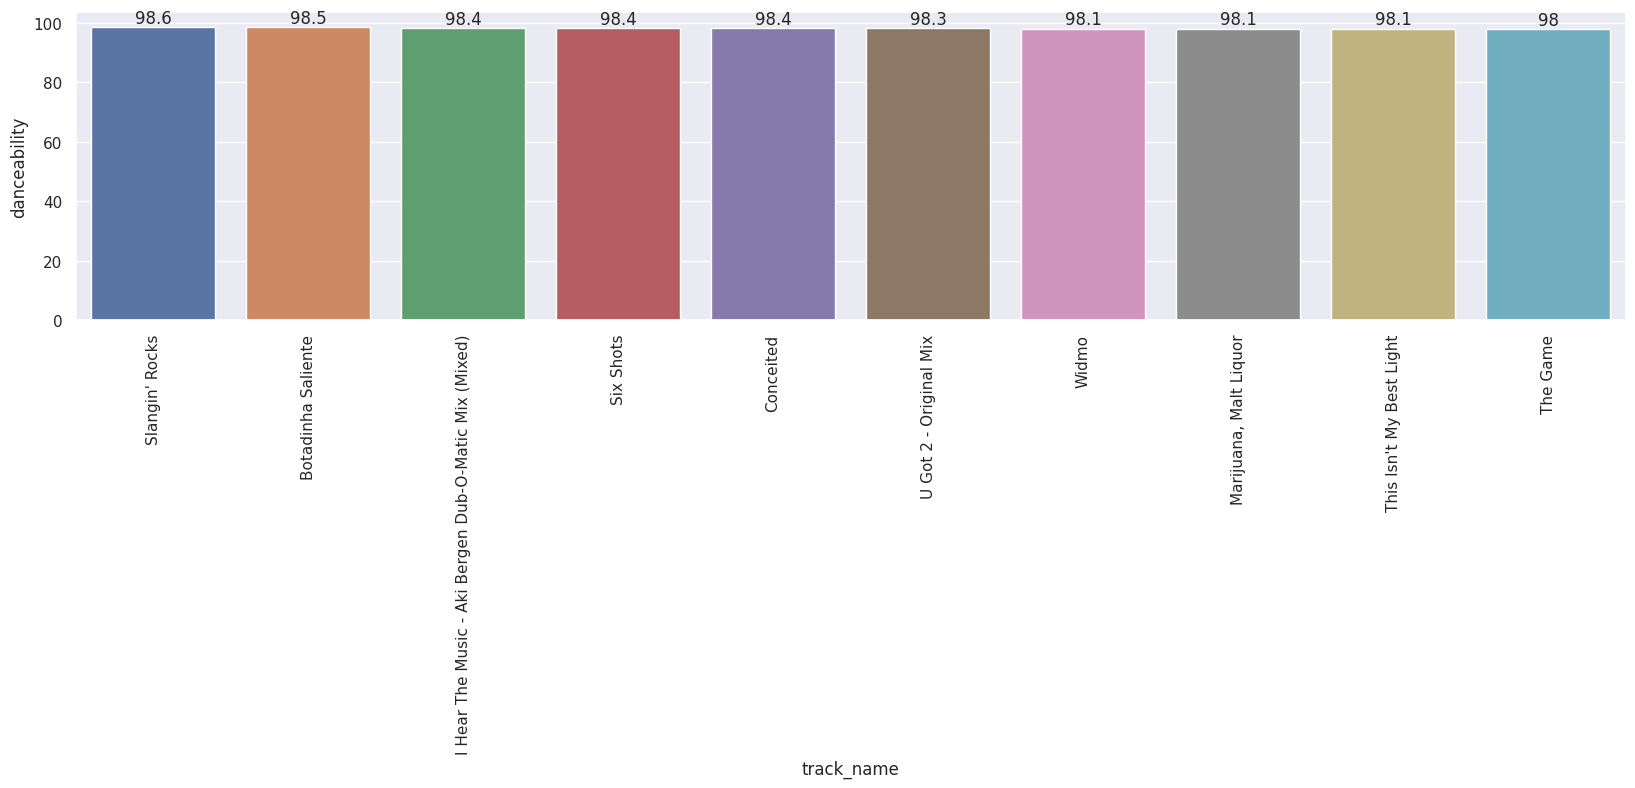

In [ ]:
df['danceability']=df['danceability']*100
df.sort_values(by='danceability',ascending =False,inplace=True)
dance=df.head(10)
plt.figure(figsize=(20,4))
ab=sns.barplot(x='track_name',y='danceability',data=dance)
ab.set_xticklabels(ab.get_xticklabels(), rotation=90)
for i in ab.containers:
    ab.bar_label(i,)

Text(0, 0.5, 'avg loudness')

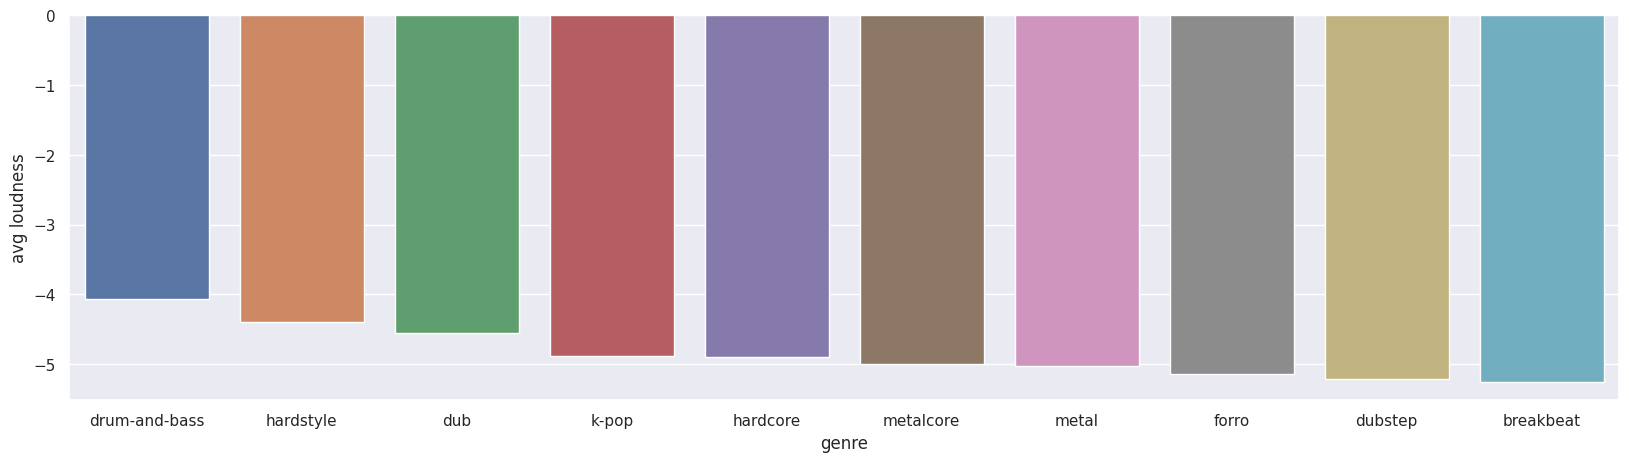

In [ ]:
loudness_genreh=df.groupby('genre')['loudness'].mean().sort_values(ascending=False)
loudness_genreh=loudness_genreh[:10,]
plt.figure(figsize=(20,5))
sns.barplot(x=loudness_genreh.index,y=loudness_genreh.values)
plt.ylabel('avg loudness')

Text(0, 0.5, 'avg loudness')

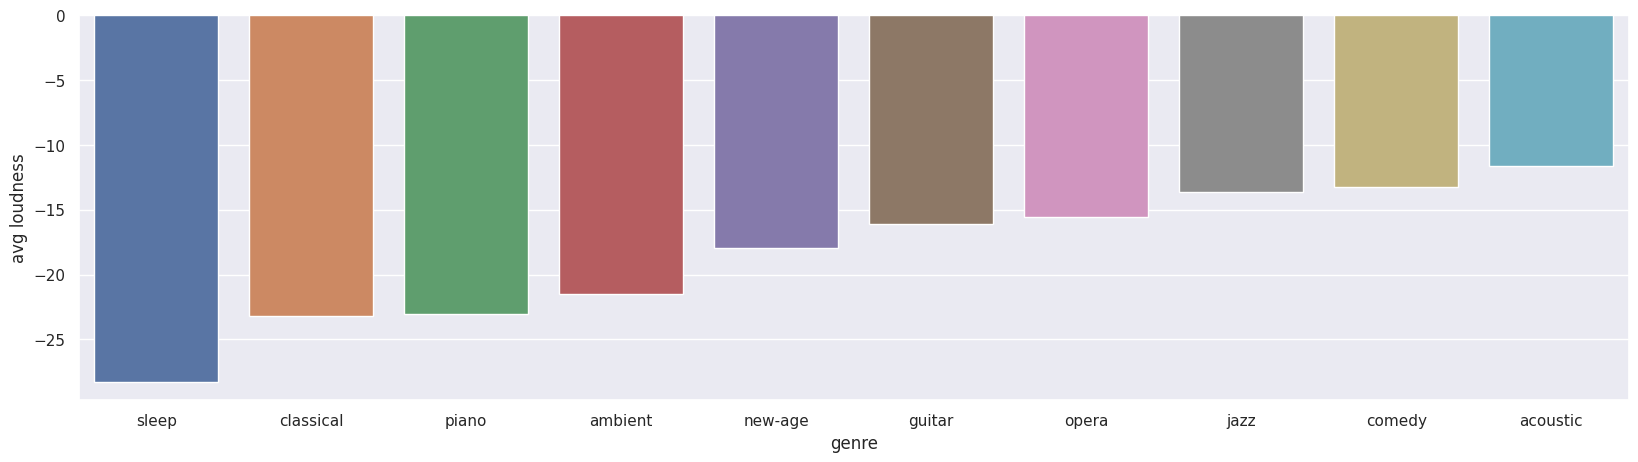

In [ ]:
loudness_genrel=df.groupby('genre')['loudness'].mean().sort_values()
loudness_genrel=loudness_genrel[:10,]
plt.figure(figsize=(20,5))
sns.barplot(x=loudness_genrel.index,y=loudness_genrel.values)
plt.ylabel('avg loudness')

<Axes: xlabel='genre', ylabel='avg speechiness'>

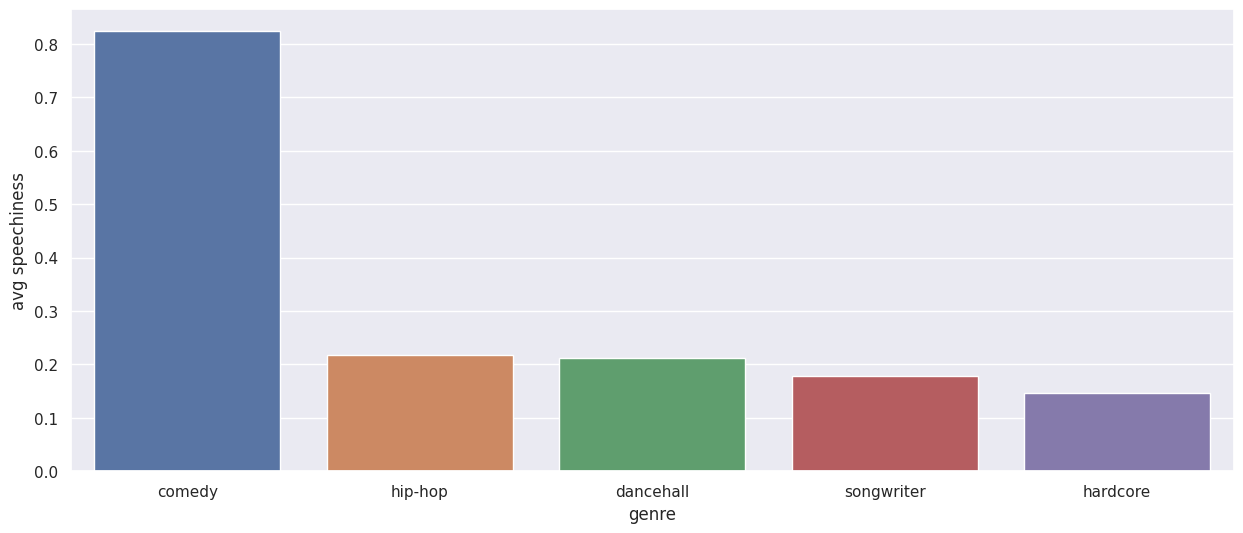

In [ ]:
speech=df.groupby('genre')['speechiness'].mean().sort_values(ascending=False)
speech=speech[:5,]
plt.ylabel('avg speechiness')
sns.barplot(x=speech.index,y=speech.values)

<Axes: xlabel='genre', ylabel='avg instrumentalness'>

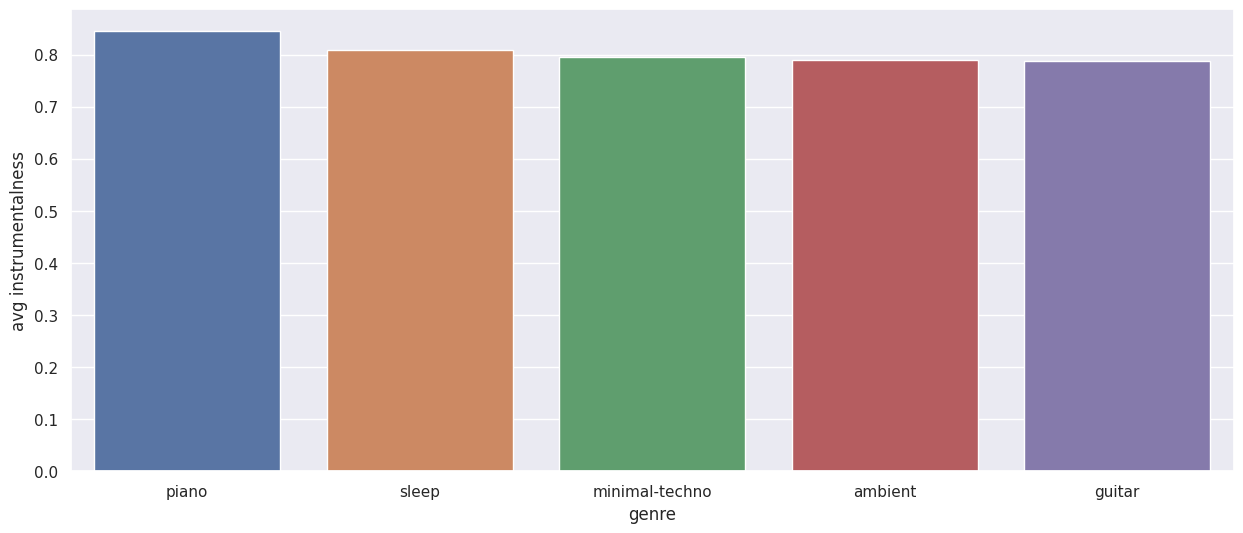

In [ ]:
top_instrumentless=df.groupby('genre')['instrumentalness'].mean().sort_values(ascending=False)
top_instrumentless=top_instrumentless[:5,]
plt.ylabel('avg instrumentalness')
sns.barplot(x=top_instrumentless.index,y=top_instrumentless.values)

In [ ]:
df['E-D_Interaction'] = df['energy'] * df['danceability']

<Axes: xlabel='genre'>

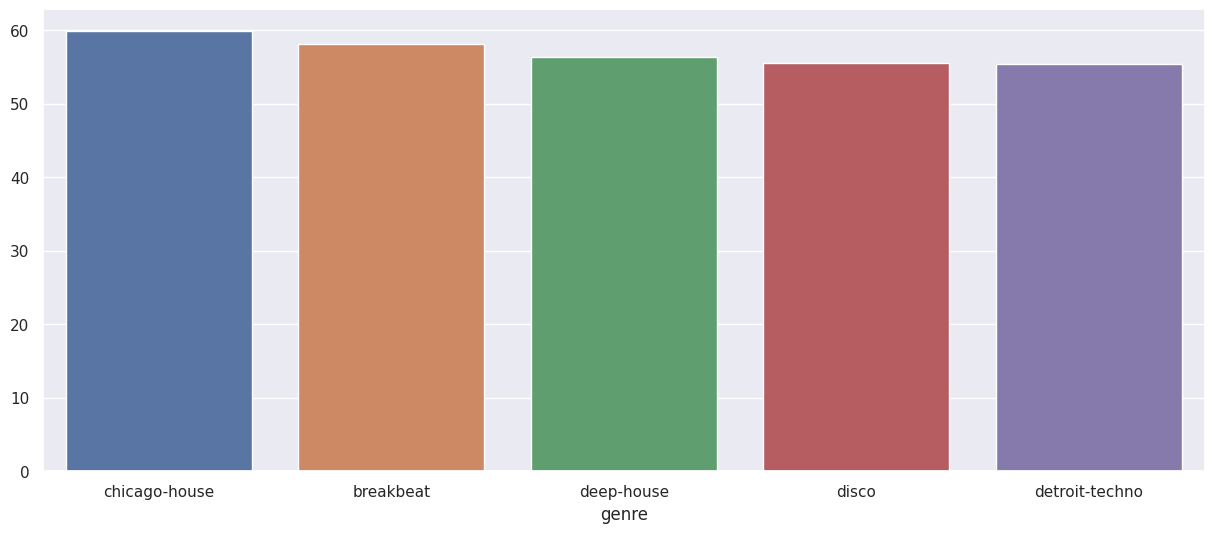

In [ ]:
top_instrumentless=df.groupby('genre')['E-D_Interaction'].mean().sort_values(ascending=False)
top_instrumentless=top_instrumentless[:5,]
sns.barplot(x=top_instrumentless.index,y=top_instrumentless.values)

In [ ]:
bpm_ranges = {
    'slow': (0, 99.910000),
    'medium': (99.910000, 122.107000),
    'fast': (122.107000, 139.990000),
    'rapid': (139.990000, 249.993000)
}

In [ ]:
def categorize_bpm(tempo):
    for bpm_range, (min_bpm, max_bpm) in bpm_ranges.items():
        if min_bpm <= tempo < max_bpm:
            return bpm_range
    return 'unknown'

In [ ]:
df['bpm_group'] = df['tempo'].apply(categorize_bpm)

<Axes: xlabel='bpm_group', ylabel='Count'>

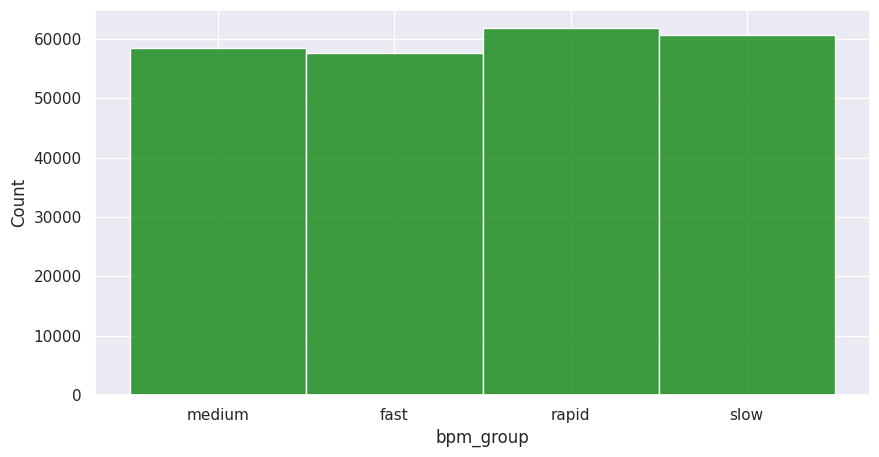

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='bpm_group',color='green', bins = 5)

In [ ]:
df['speechiness'].describe(include='all')

count    238493.000000
mean          0.097213
std           0.132218
min           0.000000
25%           0.038000
50%           0.051800
75%           0.092900
max           0.967000
Name: speechiness, dtype: float64

In [ ]:
df.drop(df[df['speechiness'] == 0.000000].index, inplace = True)

In [ ]:
df['ED_Interaction'] = df['energy'] * df['danceability']

In [ ]:
from numpy.lib.function_base import average
print("Min tempo: ", min(df['tempo']))
print("Max tempo: ", max(df['tempo']))
print("Avg tempo: ", average(df['tempo']))
print("------------------")
print(df['tempo'].describe(include='all'))

Min tempo:  31.237
Max tempo:  247.465
Avg tempo:  121.99296783939837
------------------
count    238304.000000
mean        121.992968
std          29.893482
min          31.237000
25%          99.426500
50%         122.264000
75%         140.047000
max         247.465000
Name: tempo, dtype: float64


In [ ]:
bpm_ranges = {
    'slow': (0, 99.910000),
    'medium': (99.910000, 122.107000),
    'fast': (122.107000, 139.990000),
    'rapid': (139.990000, 249.993000)
}

In [ ]:
# Function to categorize BPM into ranges
def categorize_bpm(tempo):
    for bpm_range, (min_bpm, max_bpm) in bpm_ranges.items():
        if min_bpm <= tempo < max_bpm:
            return bpm_range
    return 'unknown'

In [ ]:
df['bpm_group'] = df['tempo'].apply(categorize_bpm)

In [ ]:
df['IS_Ratio'] = df['instrumentalness']/ df['speechiness']
# representing the balance between vocals and instrumental elements.

In [ ]:
average_acousticness_by_genre = df.groupby('genre')['acousticness'].mean().reset_index()
average_acousticness_by_genre.rename(columns={'acousticness': 'average_acousticness'}, inplace=True)
df = df.merge(average_acousticness_by_genre, on='genre')

In [ ]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_mins', 'E-D_Interaction', 'bpm_group',
       'ED_Interaction', 'IS_Ratio', 'average_acousticness'],
      dtype='object')

Data Distribution


In [ ]:
print("Count of unique artist:",df['artist_name'].nunique())
print("Count of unique track_name:",df['track_name'].nunique())
print("Count of unique genre:",df['genre'].nunique())

Count of unique artist: 30273
Count of unique track_name: 196338
Count of unique genre: 82


<ipython-input-752-77f3bb75760f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'comedy'),
 Text(1, 0, 'funk'),
 Text(2, 0, 'chicago-house'),
 Text(3, 0, 'deep-house'),
 Text(4, 0, 'dance'),
 Text(5, 0, 'disco'),
 Text(6, 0, 'french'),
 Text(7, 0, 'detroit-techno'),
 Text(8, 0, 'german'),
 Text(9, 0, 'hip-hop'),
 Text(10, 0, 'minimal-techno'),
 Text(11, 0, 'party'),
 Text(12, 0, 'blues'),
 Text(13, 0, 'techno'),
 Text(14, 0, 'rock'),
 Text(15, 0, 'house'),
 Text(16, 0, 'electro'),
 Text(17, 0, 'afrobeat'),
 Text(18, 0, 'groove'),
 Text(19, 0, 'sad'),
 Text(20, 0, 'club'),
 Text(21, 0, 'spanish'),
 Text(22, 0, 'indian'),
 Text(23, 0, 'progressive-house'),
 Text(24, 0, 'country'),
 Text(25, 0, 'swedish'),
 Text(26, 0, 'dancehall'),
 Text(27, 0, 'trip-hop'),
 Text(28, 0, 'ska'),
 Text(29, 0, 'pop'),
 Text(30, 0, 'jazz'),
 Text(31, 0, 'chill'),
 Text(32, 0, 'garage'),
 Text(33, 0, 'electronic'),
 Text(34, 0, 'edm'),
 Text(35, 0, 'emo'),
 Text(36, 0, 'forro'),
 Text(37, 0, 'hardcore'),
 Text(38, 0, 'dub'),
 Text(39, 0, 'breakbeat'),
 Text(40, 0, 'k-pop'),
 

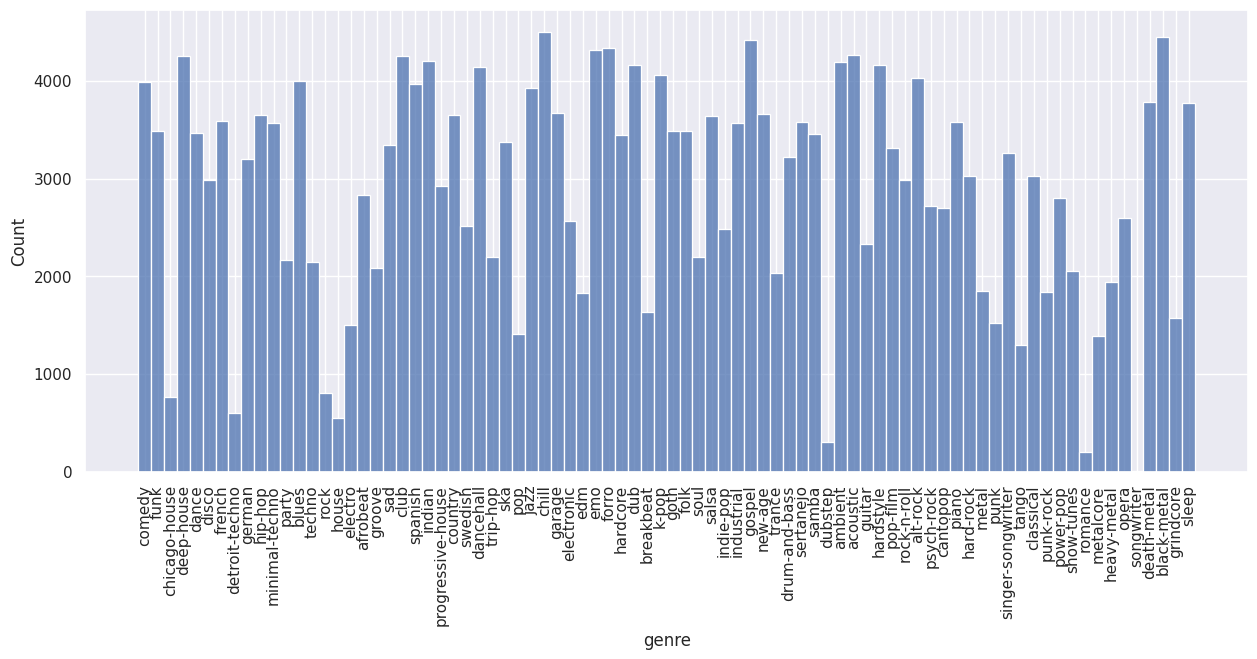

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
ax=sns.histplot(df["genre"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
df[df['genre'] == 'songwriter']

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,time_signature,duration_mins,E-D_Interaction,bpm_group,ED_Interaction,IS_Ratio,average_acousticness
224709,Jake Cornell,playing yourself,31,2022,songwriter,68.0,0.488,0,-7.521,1,...,0.3940,0.688,148.017,4,2.190367,33.1840,rapid,33.1840,0.000000,0.581
224710,JORDY,Dressed Up In A T-Shirt,23,2021,songwriter,65.3,0.497,9,-9.172,1,...,0.0993,0.783,79.906,4,2.526983,32.4541,slow,32.4541,0.000000,0.581
224711,安溥,Miss missed Love,37,2022,songwriter,58.1,0.421,7,-11.319,0,...,0.3410,0.348,116.911,4,3.113000,24.4601,medium,24.4601,0.004229,0.581
224712,Lady Lamb,Untitled Soul,14,2019,songwriter,48.5,0.496,7,-6.394,1,...,0.0794,0.239,115.892,3,4.624667,24.0560,medium,24.0560,0.007460,0.581
224713,Yusuf / Cat Stevens,Tea For The Tillerman,27,2020,songwriter,46.6,0.286,0,-8.703,1,...,0.1910,0.599,211.315,4,0.996667,13.3276,rapid,13.3276,0.005832,0.581


In [ ]:
df.drop(df[df['genre'] == 'songwriter'].index, inplace = True)

<ipython-input-755-77f3bb75760f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'comedy'),
 Text(1, 0, 'funk'),
 Text(2, 0, 'chicago-house'),
 Text(3, 0, 'deep-house'),
 Text(4, 0, 'dance'),
 Text(5, 0, 'disco'),
 Text(6, 0, 'french'),
 Text(7, 0, 'detroit-techno'),
 Text(8, 0, 'german'),
 Text(9, 0, 'hip-hop'),
 Text(10, 0, 'minimal-techno'),
 Text(11, 0, 'party'),
 Text(12, 0, 'blues'),
 Text(13, 0, 'techno'),
 Text(14, 0, 'rock'),
 Text(15, 0, 'house'),
 Text(16, 0, 'electro'),
 Text(17, 0, 'afrobeat'),
 Text(18, 0, 'groove'),
 Text(19, 0, 'sad'),
 Text(20, 0, 'club'),
 Text(21, 0, 'spanish'),
 Text(22, 0, 'indian'),
 Text(23, 0, 'progressive-house'),
 Text(24, 0, 'country'),
 Text(25, 0, 'swedish'),
 Text(26, 0, 'dancehall'),
 Text(27, 0, 'trip-hop'),
 Text(28, 0, 'ska'),
 Text(29, 0, 'pop'),
 Text(30, 0, 'jazz'),
 Text(31, 0, 'chill'),
 Text(32, 0, 'garage'),
 Text(33, 0, 'electronic'),
 Text(34, 0, 'edm'),
 Text(35, 0, 'emo'),
 Text(36, 0, 'forro'),
 Text(37, 0, 'hardcore'),
 Text(38, 0, 'dub'),
 Text(39, 0, 'breakbeat'),
 Text(40, 0, 'k-pop'),
 

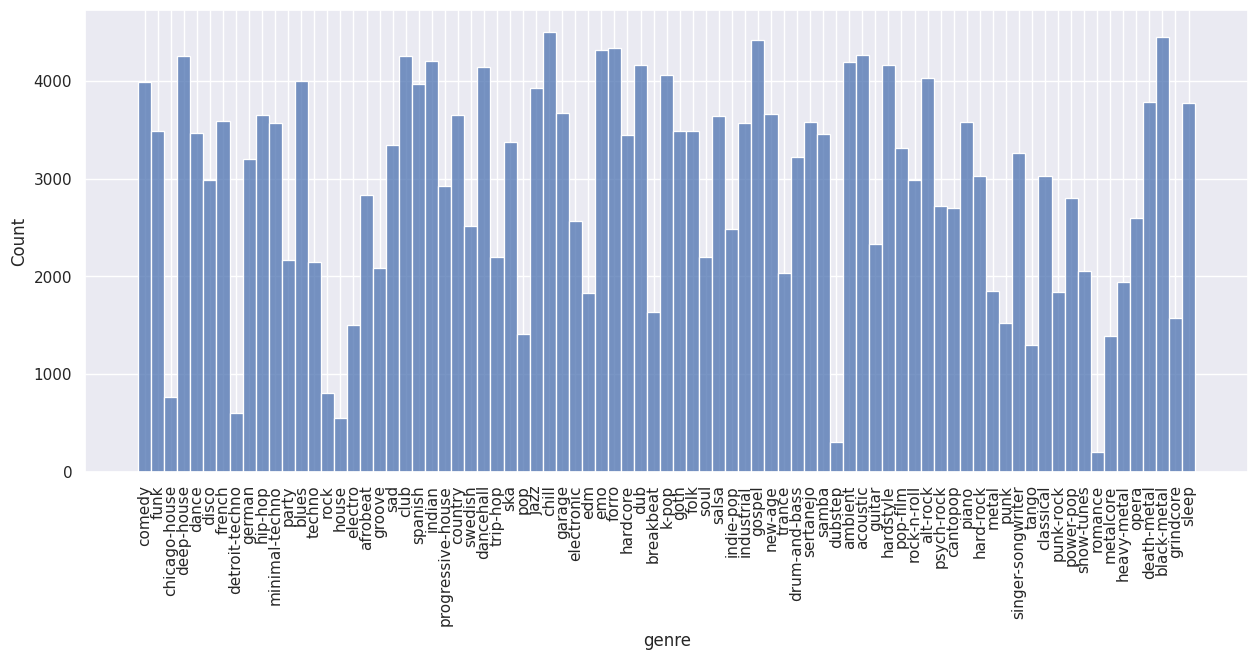

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)})
ax=sns.histplot(df["genre"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
top_ten_genres = df['genre'].value_counts().nlargest(10).index.tolist()

In [ ]:
bottom_ten_genres = df['genre'].value_counts().nsmallest(10).index.tolist()

In [ ]:
print(top_ten_genres)

['chill', 'black-metal', 'gospel', 'forro', 'emo', 'acoustic', 'deep-house', 'club', 'indian', 'ambient']


In [ ]:
print(bottom_ten_genres)

['romance', 'dubstep', 'house', 'detroit-techno', 'chicago-house', 'rock', 'tango', 'metalcore', 'pop', 'electro']


<Axes: ylabel='Frequency'>

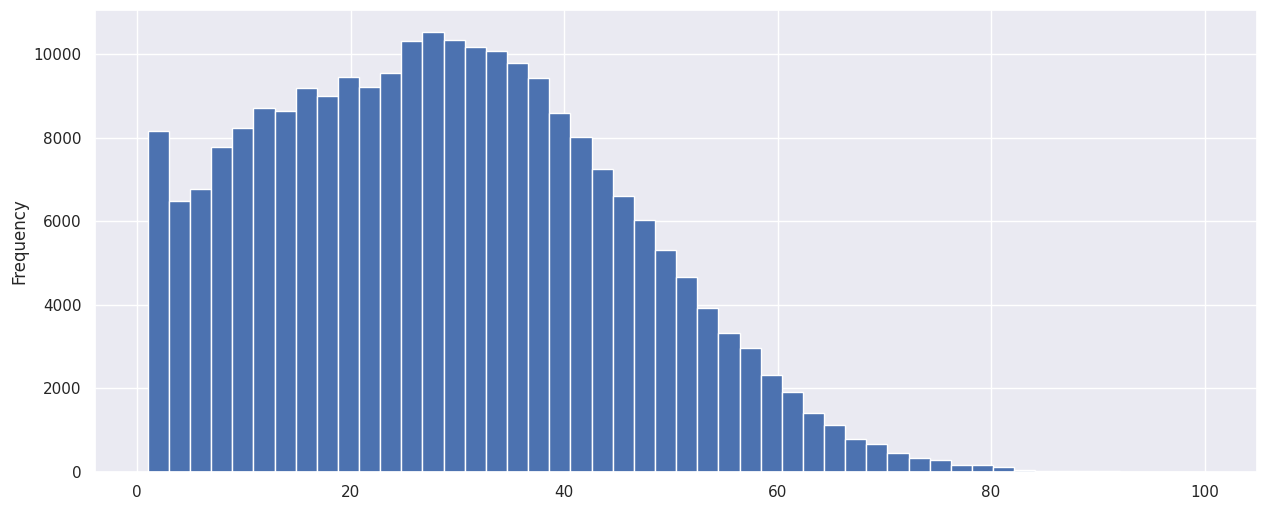

In [ ]:
df['popularity'].plot(kind='hist', bins=50)

In [ ]:
for i, row in df.iterrows():
  score = 'low'
  if row.popularity >=40:
    score = 'popular'
  df.at[i, 'popular'] = score

In [ ]:
df.tail(10)

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,...,valence,tempo,time_signature,duration_mins,E-D_Interaction,bpm_group,ED_Interaction,IS_Ratio,average_acousticness,popular
238294,Granular,Deep Brown Noise,54,2021,sleep,5.66,0.53300,1,-36.130,1,...,0.03690,133.324,4,2.058883,3.016780,fast,3.016780,19.308176,0.746776,popular
238295,Tmsoft’s White Noise Sleep Sounds,Quiet 737 Airplane Cabin,19,2019,sleep,5.60,0.00994,1,-35.322,1,...,0.03210,65.281,3,30.000000,0.055664,slow,0.055664,15.455951,0.746776,low
238296,Binaural Beats,Isochronic Tones 295.8 Hz (Fat Cells-metaphysi...,16,2019,sleep,5.59,0.25400,7,-32.798,0,...,0.03060,60.888,4,10.000983,1.419860,slow,1.419860,8.423423,0.746776,low
238297,Sleep Miracle,Brown Sleep Noise,82,2020,sleep,5.55,0.08370,1,-30.397,1,...,0.06000,59.509,4,4.133333,0.464535,slow,0.464535,6.802721,0.746776,popular
238298,Calm Ocean Sounds,Atlantic Wash,26,2019,sleep,5.54,0.99000,1,-18.467,1,...,0.00001,54.952,3,2.266667,5.484600,slow,5.484600,15.562701,0.746776,low
238299,Sleep Fruits Music,30 Min Brown Noise,23,2022,sleep,5.54,0.03970,1,-34.734,1,...,0.01500,66.879,4,30.200000,0.219938,slow,0.219938,5.649718,0.746776,low
238300,Rain Sounds,Heavy Pouring Rain,23,2021,sleep,5.54,0.99200,8,-12.673,0,...,0.00001,55.939,4,3.566667,5.495680,slow,5.495680,14.271137,0.746776,low
238301,Granular,Brown Noise 68 hz,24,2019,sleep,5.45,0.04690,1,-31.820,0,...,0.02530,63.428,4,2.898367,0.255605,slow,0.255605,5.576619,0.746776,low
238302,White Noise Babies,"Vaccum Cleaner Noise, Pt. 27",44,2020,sleep,5.34,0.03390,3,-16.455,1,...,0.02480,48.647,4,1.387033,0.181026,slow,0.181026,16.666667,0.746776,popular
238303,Linder Valley,Polyrhythm Droplets,33,2021,sleep,4.69,0.04470,10,-50.769,0,...,0.19900,81.353,3,2.452033,0.209643,slow,0.209643,16.350000,0.746776,low


In [ ]:
columns = df[['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode',
              'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature',
              'ED_Interaction', 'bpm_group', 'IS_Ratio', 'average_acousticness']]

In [ ]:
X = columns.select_dtypes(include='number')
y = df['popular']

In [ ]:
X.head()

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,ED_Interaction,IS_Ratio,average_acousticness
0,2020,98.6,0.351,6,-10.660,1,0.2260,0.00378,0.000000,0.0898,0.357,114.984,3.780433,4,34.6086,0.000000,0.753392
1,2020,98.1,0.344,5,-11.622,0,0.0785,0.02010,0.000001,0.2650,0.850,119.991,5.935017,4,33.7464,0.000018,0.753392
2,2023,97.8,0.563,9,-6.937,1,0.0716,0.01130,0.000000,0.1050,0.898,121.021,1.923633,4,55.0614,0.000000,0.753392
3,2019,97.4,0.520,1,-6.849,1,0.3400,0.55500,0.000000,0.0455,0.216,117.994,6.668883,4,50.6480,0.000000,0.753392
4,2020,97.1,0.318,5,-13.634,0,0.3140,0.00531,0.000000,0.0911,0.541,108.023,2.947483,4,30.8778,0.000000,0.753392


Model Building

In [ ]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_mins', 'E-D_Interaction', 'bpm_group',
       'ED_Interaction', 'IS_Ratio', 'average_acousticness', 'popular'],
      dtype='object')

In [ ]:
all_columns = df[['artist_name', 'track_name', 'popularity', 'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
              'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature',
              'ED_Interaction', 'bpm_group', 'IS_Ratio', 'average_acousticness']]

In [ ]:
corr_matrix = columns.corr()
corr_matrix['popularity'].sort_values(ascending = False)

<ipython-input-775-4deee951413e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = columns.corr()


popularity              1.000000
danceability            0.187209
ED_Interaction          0.085410
loudness                0.077818
time_signature          0.031902
valence                 0.025170
year                    0.020342
tempo                   0.005511
key                     0.004606
mode                   -0.031420
acousticness           -0.036386
average_acousticness   -0.037501
energy                 -0.039885
speechiness            -0.071783
liveness               -0.115251
IS_Ratio               -0.123425
duration_mins          -0.155682
instrumentalness       -0.156456
Name: popularity, dtype: float64

In [ ]:
results = ols("popularity ~ ED_Interaction + IS_Ratio + year + danceability + energy + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_mins", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2121.
Date:                Sun, 30 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:25:46   Log-Likelihood:            -9.9065e+05
No. Observations:              238299   AIC:                         1.981e+06
Df Residuals:                  238284   BIC:                         1.981e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -493.5012     47.553  

In [ ]:
cat_columns = ['genre', 'mode', 'year']
num_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
               'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature']
target = 'popularity'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [ ]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

Linear Regression

In [ ]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_mins',
                                                   'time_signature'])])),
                ('regressor', LinearRegression())])

In [ ]:
pred = linear_regression.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(pred, y_test))
print('RMSE:' ,RMSE)

r2 = r2_score(y_test, pred)
print("R-squared value:", r2)

RMSE: 10.263323725567293
R-squared value: 0.6053736021831544


Ridge Regression

In [ ]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [ ]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_mins',
                                                   'time_signature'])])),
                ('regressor', Ridge(alpha=3.0))])

In [ ]:
pred_ridge = ridge_regression.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(pred_ridge, y_test))
print('RMSE:' ,RMSE)

r2 = r2_score(y_test, pred_ridge)
print("R-squared value:", r2)

RMSE: 10.263479837756604
R-squared value: 0.6053615970158023


Lasso Regression

In [ ]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [ ]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_mins',
                                                   'time_signature'])])),
                ('regressor', Lasso())])

In [ ]:
lasso_pred = lasso_regression.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(lasso_pred, y_test))
print('RMSE:', RMSE)

r2 = r2_score(y_test, lasso_pred)
print("R-squared value:", r2)

RMSE: 15.77528139690833
R-squared value: 0.06768148781404026


Elastic Net

In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [ ]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_mins',
                                                   'time_signature'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [ ]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
print('RMSE', RMSE)

r2 = r2_score(y_test, elasticnet_pred)
print("R-squared value:", r2)

RMSE 15.76414483835671
R-squared value: 0.06899736352658548


Logistic Regression

In [ ]:
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)

In [ ]:
from sklearn import datasets, linear_model, metrics

log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [ ]:
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 74.63561337249965


K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [ ]:
print("KNN Model Accuracy (in %):",
metrics.accuracy_score(y_test, pred) * 100)

KNN Model Accuracy (in %): 69.4964330675619


Random Forest

In [ ]:
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

In [ ]:
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Random Forest Model Accuracy (in %): 83.86347740942789


Decision Tree

In [ ]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=2)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

In [ ]:
print("Decsision Tree Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Decsision Tree Model Accuracy (in %): 73.96838718701918
